In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy
from z3 import *

In [2]:
def sol_print(solution):
    x= np.ones((3,3))
    groups = np.block([[x*0,x*1,x*2],[x*3,x*4,x*5],[x*6,x*7,x*8]])
    
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    x = np.array(solution.astype('int').astype('str'))
    x[x=="0"] ="-"
    ax = sns.heatmap(groups,annot=x,cbar=False,cmap="tab20",fmt="",vmin=0,vmax=19,linewidths=1,annot_kws={"size":14})
    ax.axis("off")    
    plt.tight_layout()
    plt.show()

In [3]:
fix = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 5, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 9, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0]])


sol =np.array([[2, 3, 6, 9, 4, 1, 8, 7, 5], 
               [9, 5, 4, 3, 7, 8, 6, 1, 2], 
               [8, 7, 1, 6, 2, 5, 4, 3, 9],  
               [1, 8, 2, 4, 3, 9, 7, 5, 6],
               [3, 9, 7, 8, 5, 6, 1, 2, 4],
               [6, 4, 5, 2, 1, 7, 3, 9, 8],
               [4, 1, 3, 5, 6, 2, 9, 8, 7],
               [5, 6, 9, 7, 8, 3, 2, 4, 1],
               [7, 2, 8, 1, 9, 4, 5, 6, 3]])

#fix= sol

rows = [4,33,20,17,26,10,16,24,0]
cols = [8,4,17,35,14,13,3,10,25,0] 

In [4]:
X = np.array(IntVector('x', 9*9),dtype=object).reshape(9,9)
s = Tactic('default').solver()

# numbers between 1 & 9
s += [And(e > 0  ,e <=9) for (i,j),e in np.ndenumerate(X)]

# rows & columns
s += And([Distinct([e for (i,j),e in np.ndenumerate(X) if i == n]) for n in range(9)])
s += And([Distinct([e for (i,j),e in np.ndenumerate(X) if j == n]) for n in range(9)])

# groups
x= np.ones((3,3))
groups = np.block([[x*0,x*1,x*2],[x*3,x*4,x*5],[x*6,x*7,x*8]])
s += And([Distinct([e for (i,j),e in np.ndenumerate(X) if groups[i,j] == n]) for n in range(9)])

# set fixed
s += And([e == int(fix[i,j]) for (i,j),e in np.ndenumerate(X) if fix[i,j] != 0])  

# sandwich 
s += [And([Implies(Or(And(X[i,n] == 9,X[j,n] == 1),And(X[i,n] == 1,X[j,n] == 9)),sum(X[i+1:j,n]) == cols[n]) for i in range(9) for j in range(9) if j > i ]) for n in range(9)]
s += [And([Implies(Or(And(X[n,i] == 9,X[n,j] == 1),And(X[n,i] == 1,X[n,j] == 9)),sum(X[n,i+1:j]) == rows[n]) for i in range(9) for j in range(9) if j > i ]) for n in range(9)]


Solved in 824.0027 seconds


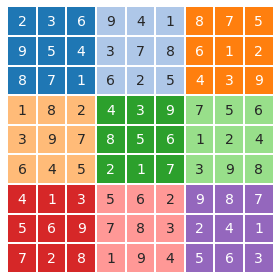

In [5]:
start = time.time()
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    r =  evalu(X)
    print("Solved in {:.4f} seconds".format(time.time()-start))
    sol_print(r)
else:
    print("Failed in {:.4f} seconds".format(time.time()-start))